In [36]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [ ]:
CODIGO CON ENLACE PRINCIPAL Y CONTENIDO NOTICIA

In [4]:
#ultimo 7 columnas con contenido


from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd

# Lista de URLs
urls = [
    'https://rpp.pe/archivo/2023-09-23',
    #'https://rpp.pe/archivo/2023-10-01',
    #'https://rpp.pe/archivo/2023-09-30'
]

# Lista para almacenar los datos
all_data = []

# Bucle para procesar cada URL
for url in urls:
    # Configurando el WebDriver
    driver = webdriver.Chrome()

    # Abriendo la página
    driver.get(url)

    # Esperar un momento para que la página cargue completamente
    time.sleep(3)

    # Extraer la fecha
    fecha = driver.find_element(By.XPATH, '//*[@id="rpp-app"]/main/div[2]/div[1]/header/h1').text

    # Haciendo scroll y presionando el botón
    for _ in range(7):  # Realizará el scroll y presionará el botón 7 veces
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        driver.execute_script("arguments[0].click();", driver.find_element(By.XPATH, '//button[@class="button button__viewmore"]/span[1]'))
        time.sleep(2)

    # Extrayendo los elementos de noticias
    articles = driver.find_elements(By.XPATH, '//body/div[4]/main[1]/div[2]/div[1]/div[1]/div[1]/article')

    # Creando una lista para almacenar los datos de esta URL
    data = []

    # Extrayendo los datos de cada noticia
    for article in articles:
        title_element = article.find_element(By.TAG_NAME, 'h2')
        title = title_element.text
        link = title_element.find_element(By.TAG_NAME, 'a').get_attribute('href')

        try:
            author = article.find_element(By.XPATH, "./div/div/span/a").text
        except:
            author = ""
        try:
            time_published = article.find_element(By.XPATH, "./div/div/time").text
        except:
            time_published = ""
        try:
            tipe = article.find_element(By.XPATH, "./div/h3/a").text
        except:
            tipe = ""
        data.append([title, author, time_published, tipe, fecha, link])

    # Cerrando el WebDriver
    driver.quit()

    # Añadir los datos de esta URL a la lista general
    all_data.extend(data)

# Creando un DataFrame
df = pd.DataFrame(all_data, columns=['Título', 'Autor', 'Hora de Publicación', 'tipo_noticia', 'Fecha', 'Enlace'])

# Scraping de contenido y añadiendo a la columna 'Contenido'
for index, row in df.iterrows():
    url = row['Enlace']
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(5)
    contenido = driver.find_element(By.XPATH, '//*[@id="rpp-app"]/div[2]/article/div/div[1]/div/div[2]/div[4]/p[1]').text
    driver.quit()
    df.at[index, 'Contenido'] = contenido

# Mostrando el DataFrame
print(df)


                                               Título  \
0   La región de Ica exportó alimentos por más de ...   
1   ¡Pacanga en la casa! Jota se coronó como trica...   
2   Áncash: dos fallecidos, entre ellos un menor d...   
3   MEF: Pedido del Poder Judicial para duplicar s...   
4   Loreto: dictan 9 meses de prisión preventiva c...   
5   Sergio Peña anotó en la victoria del Malmo en ...   
6   Tula Rodríguez sobre su vida tras la pérdida d...   
7   Pudo llegar a mayores: Mario Tajima explotó co...   
8   Red Bull Perú 2023: fecha, hora, dónde y cómo ...   
9   'Epifanías' de Susana Baca, el disco nominado ...   
10  Arequipa: un hombre fue asesinado de cuatro ba...   
11  Extrabajadora arremete contra Shakira: "Es la ...   
12  Contraloría advierte que el Gobierno Regional ...   
13  Cantolao cayó ante Binacional 1-0 y solo un mi...   
14  Xavi le da mérito al Barcelona tras remontada:...   
15  "La Red Bull Perú es la más rapera": mira el c...   
16  Flor Bromley, la peruana no

In [ ]:
********************************************************************************************************************

In [ ]:
CODIGO CON COLUMNAS Y ENLACES

In [4]:



from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd

# Lista de URLs
urls = [
     'https://rpp.pe/archivo/2023-10-02',
    'https://rpp.pe/archivo/2023-10-01',
    'https://rpp.pe/archivo/2023-09-30',
    'https://rpp.pe/archivo/2023-09-29',
    'https://rpp.pe/archivo/2023-09-28',
    'https://rpp.pe/archivo/2023-09-27',
    'https://rpp.pe/archivo/2023-09-26',
    'https://rpp.pe/archivo/2023-09-25',
    'https://rpp.pe/archivo/2023-09-24',
    'https://rpp.pe/archivo/2023-09-23',
    'https://rpp.pe/archivo/2023-09-22',
    'https://rpp.pe/archivo/2023-09-21',
    'https://rpp.pe/archivo/2023-09-20',
    'https://rpp.pe/archivo/2023-09-19',
    'https://rpp.pe/archivo/2023-09-18',
    'https://rpp.pe/archivo/2023-09-17',
    'https://rpp.pe/archivo/2023-09-16',
    'https://rpp.pe/archivo/2023-09-15',
    'https://rpp.pe/archivo/2023-09-14',
    'https://rpp.pe/archivo/2023-09-13',
    'https://rpp.pe/archivo/2023-09-12',
    'https://rpp.pe/archivo/2023-09-11',
    'https://rpp.pe/archivo/2023-09-10',
    'https://rpp.pe/archivo/2023-09-09',
    'https://rpp.pe/archivo/2023-09-08',
    'https://rpp.pe/archivo/2023-09-07',
    'https://rpp.pe/archivo/2023-09-06',
    'https://rpp.pe/archivo/2023-09-05',
    'https://rpp.pe/archivo/2023-09-04',
    'https://rpp.pe/archivo/2023-09-03',
    'https://rpp.pe/archivo/2023-09-02',
    'https://rpp.pe/archivo/2023-09-01',
]


# Lista para almacenar los datos
all_data = []

# Bucle para procesar cada URL
for url in urls:
    # Configurando el WebDriver
    driver = webdriver.Chrome()

    # Abriendo la página
    driver.get(url)

    # Esperar un momento para que la página cargue completamente
    time.sleep(3)

    # Extraer la fecha
    fecha = driver.find_element(By.XPATH, '//*[@id="rpp-app"]/main/div[2]/div[1]/header/h1').text

    # Haciendo scroll y presionando el botón
    for _ in range(8):  # Realizará el scroll y presionará el botón 7 veces
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        driver.execute_script("arguments[0].click();", driver.find_element(By.XPATH, '//button[@class="button button__viewmore"]/span[1]'))
        time.sleep(2)

    # Extrayendo los elementos de noticias
    articles = driver.find_elements(By.XPATH, '//body/div[4]/main[1]/div[2]/div[1]/div[1]/div[1]/article')

    # Creando una lista para almacenar los datos de esta URL
    data = []

    # Extrayendo los datos de cada noticia
    for article in articles:
        title_element = article.find_element(By.TAG_NAME, 'h2')
        title = title_element.text
        link = title_element.find_element(By.TAG_NAME, 'a').get_attribute('href')

        try:
            author_element = article.find_element(By.XPATH, "./div/div/span/a")
            author = author_element.text
            author_link = author_element.get_attribute('href')
        except:
            author = ""
            author_link = ""

        try:
            time_published = article.find_element(By.XPATH, "./div/div/time").text
        except:
            time_published = ""
        try:
            tipe_element = article.find_element(By.XPATH, "./div/h3/a")
            tipe = tipe_element.text
            tipe_link = tipe_element.get_attribute('href')
        except:
            tipe = ""
            tipe_link = ""
        data.append([title, author, author_link, time_published, tipe, tipe_link, fecha, link])

    # Cerrando el WebDriver
    driver.quit()

    # Añadir los datos de esta URL a la lista general
    all_data.extend(data)

# Creando un DataFrame
df = pd.DataFrame(all_data, columns=['Título', 'Autor', 'Enlace_Autor', 'Hora de Publicación', 'tipo_noticia', 'Enlace_Tipo', 'Fecha', 'Enlace_Noticia_Principal'])

# Mostrando el DataFrame
print(df)

# Mostrando solo las primeras 10 filas
#print(df.head(10))
#df.to_excel('datos_noticias.xlsx', index=False)

                                                 Título  \
0     Arequipa: mujer fue asesinada de varias puñala...   
1     “No es una sorpresa”: Transparencia cuestionó ...   
2     Procuraduría pide que Zoraida Ávalos pague S/2...   
3     Roberto Sánchez: “No he tomado ningún centavo”...   
4     Ciudadana reitera pedido de ayuda para que su ...   
...                                                 ...   
3162  ¡Atención! Hoy habrá corte de agua en Lima: co...   
3163  HONOR abre el IFA 2023 con su nuevo plegable: ...   
3164  Dos coches bomba y decenas de guardias retenid...   
3165  Áncash: violento choque entre un bus y un trái...   
3166  Bolivia dejó de buscar gas durante una década,...   

                          Autor                     Enlace_Autor  \
0     Pedro Luis Ramos Martinez      https://rpp.pe/autor/pramos   
1               Sergio Espinoza   https://rpp.pe/autor/sespinoza   
2                Julio Cisneros   https://rpp.pe/autor/jcisneros   
3                  

In [8]:
df.to_excel('3167_datos_RPP.xlsx', index=False)

In [9]:
df.to_csv('8colum_rppnoticias.csv', index=False)

In [ ]:
IMPORTANDO EL CSV CREADO CON 3167 REGISTROS

In [11]:
import pandas as pd

# Ruta del archivo CSV en tu escritorio
ruta_archivo = r'C:/Users/karlo/OneDrive/Escritorio/RPP NOTICIAS_SCRAPING_ DEL_010923_AL_021023/3167_rppnoticias_csv.xls'

# Lee el archivo CSV
df = pd.read_csv(ruta_archivo)

# Muestra el DataFrame
print(df)


                                                 Título  \
0     Arequipa: mujer fue asesinada de varias puñala...   
1     “No es una sorpresa”: Transparencia cuestionó ...   
2     Procuraduría pide que Zoraida Ávalos pague S/2...   
3     Roberto Sánchez: “No he tomado ningún centavo”...   
4     Ciudadana reitera pedido de ayuda para que su ...   
...                                                 ...   
3162  ¡Atención! Hoy habrá corte de agua en Lima: co...   
3163  HONOR abre el IFA 2023 con su nuevo plegable: ...   
3164  Dos coches bomba y decenas de guardias retenid...   
3165  Áncash: violento choque entre un bus y un trái...   
3166  Bolivia dejó de buscar gas durante una década,...   

                          Autor                     Enlace_Autor  \
0     Pedro Luis Ramos Martinez      https://rpp.pe/autor/pramos   
1               Sergio Espinoza   https://rpp.pe/autor/sespinoza   
2                Julio Cisneros   https://rpp.pe/autor/jcisneros   
3                  

In [12]:
# Muestra la cantidad de valores nulos en cada columna
print(df.isnull().sum())

Título                        0
Autor                       648
Enlace_Autor                648
Hora de Publicación           0
tipo_noticia                  0
Enlace_Tipo                   0
Fecha                         0
Enlace_Noticia_Principal      0
dtype: int64


In [14]:
# Llena los valores nulos en la columna 'Autor' con 'desconocido'
df['Autor'].fillna('desconocido', inplace=True)
df['Enlace_Autor'].fillna('enlace_desconocido', inplace=True)
# Guarda el DataFrame actualizado en un nuevo archivo CSV (opcional)
df.to_csv(r'C:/Users/karlo/OneDrive/Escritorio/RPP NOTICIAS_SCRAPING_ DEL_010923_AL_021023/3167_datos_rppnoticias_actualizado.csv', index=False)

In [ ]:
leyendo archivo actualiza sin null

In [15]:
import pandas as pd

# Ruta del archivo CSV en tu escritorio
ruta_archivo = r'C:/Users/karlo/OneDrive/Escritorio/RPP NOTICIAS_SCRAPING_ DEL_010923_AL_021023/3167_datos_rppnoticias_actualizado.csv'

# Lee el archivo CSV
df = pd.read_csv(ruta_archivo)

# Muestra el DataFrame
print(df)

                                                 Título  \
0     Arequipa: mujer fue asesinada de varias puñala...   
1     “No es una sorpresa”: Transparencia cuestionó ...   
2     Procuraduría pide que Zoraida Ávalos pague S/2...   
3     Roberto Sánchez: “No he tomado ningún centavo”...   
4     Ciudadana reitera pedido de ayuda para que su ...   
...                                                 ...   
3162  ¡Atención! Hoy habrá corte de agua en Lima: co...   
3163  HONOR abre el IFA 2023 con su nuevo plegable: ...   
3164  Dos coches bomba y decenas de guardias retenid...   
3165  Áncash: violento choque entre un bus y un trái...   
3166  Bolivia dejó de buscar gas durante una década,...   

                          Autor                     Enlace_Autor  \
0     Pedro Luis Ramos Martinez      https://rpp.pe/autor/pramos   
1               Sergio Espinoza   https://rpp.pe/autor/sespinoza   
2                Julio Cisneros   https://rpp.pe/autor/jcisneros   
3                  

In [ ]:
VERIFICAMOS NUEVAMENTE LOS VALORES NULOS

In [16]:
# Muestra la cantidad de valores nulos en cada columna
print(df.isnull().sum())

Título                      0
Autor                       0
Enlace_Autor                0
Hora de Publicación         0
tipo_noticia                0
Enlace_Tipo                 0
Fecha                       0
Enlace_Noticia_Principal    0
dtype: int64


In [ ]:
TIPOS DE NOTICIAS

In [17]:
# Cuenta el número de noticias por tipo
conteo_por_tipo = df['tipo_noticia'].value_counts()

# Muestra el conteo
print(conteo_por_tipo)


Lima                   222
Economía               217
Actualidad             216
Fútbol Mundial         191
Celebridades           181
                      ... 
Pasco                    1
Oceanía                  1
Amazonas                 1
Desastres Naturales      1
Qatar 2022               1
Name: tipo_noticia, Length: 123, dtype: int64


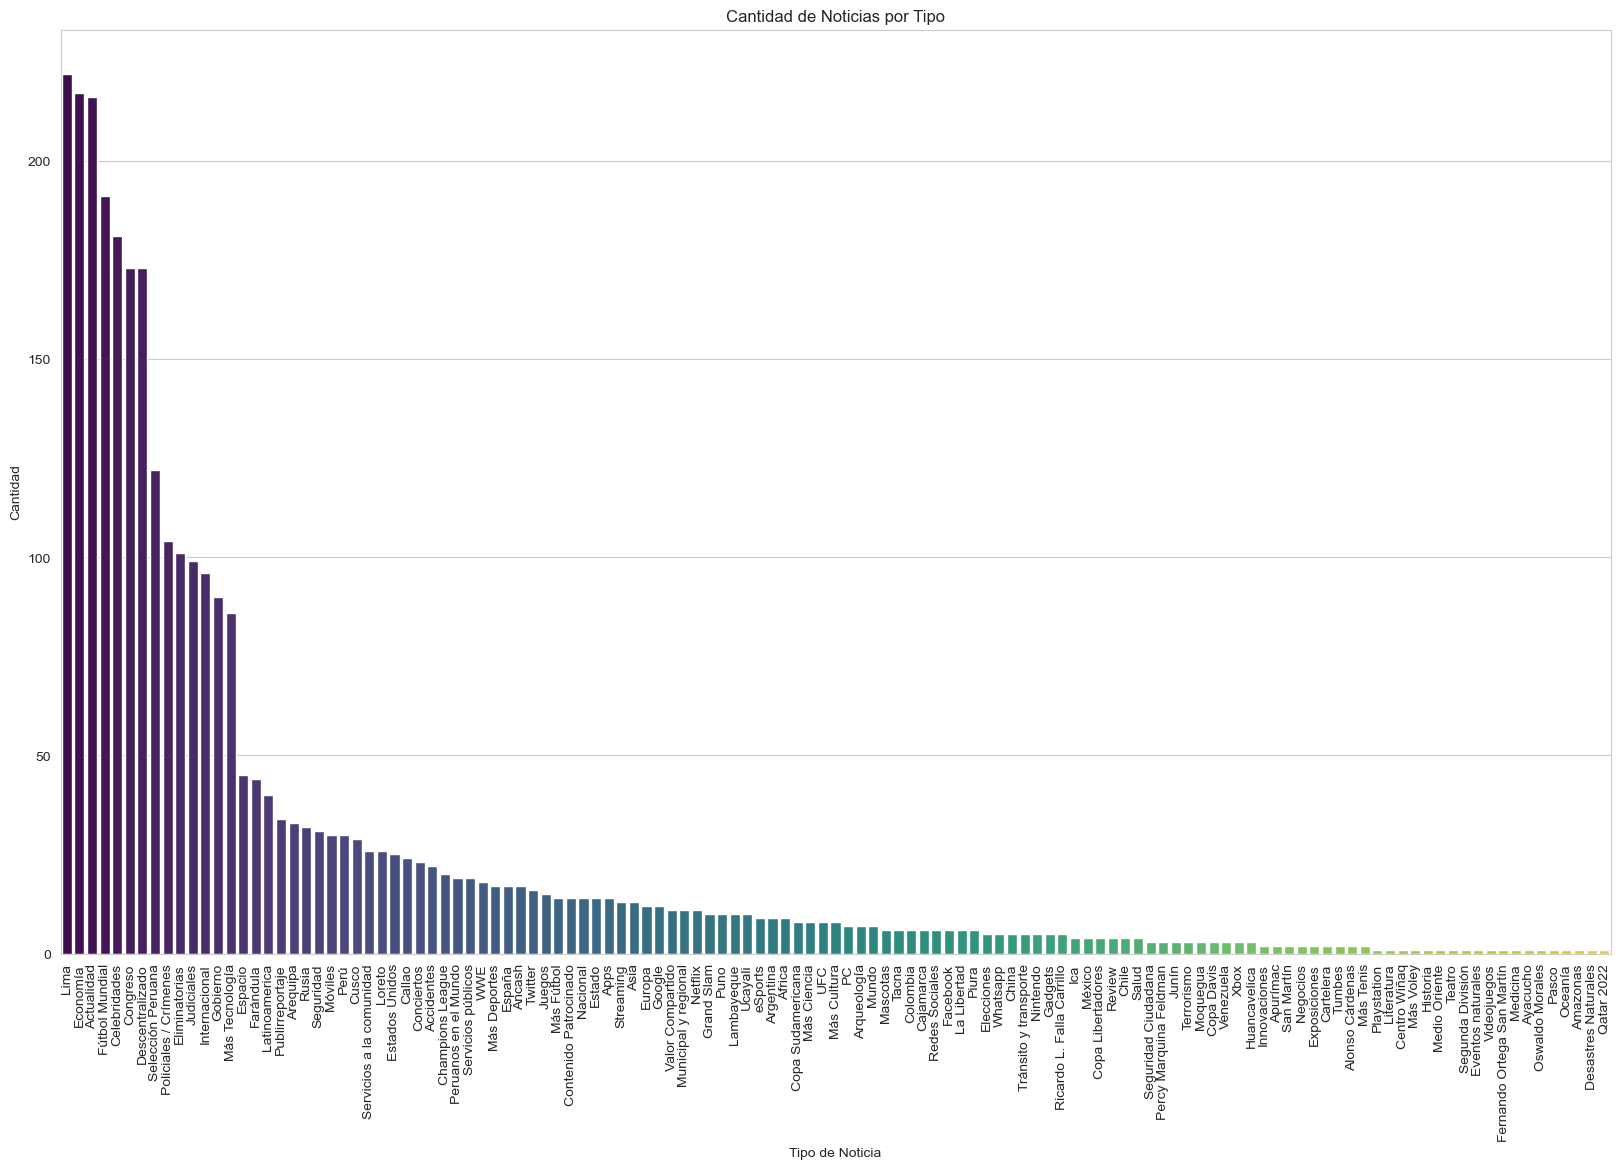

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para el gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(20, 12))

# Crear el gráfico de barras
sns.barplot(x=conteo_por_tipo.index, y=conteo_por_tipo.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel("Tipo de Noticia")
plt.ylabel("Cantidad")
plt.title("Cantidad de Noticias por Tipo")

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


In [ ]:
NOTICIAS POR FECHA

Archivo del 2 de Octubre del 2023        110
Archivo del 21 de Septiembre del 2023    110
Archivo del 5 de Septiembre del 2023     110
Archivo del 6 de Septiembre del 2023     110
Archivo del 7 de Septiembre del 2023     110
Archivo del 12 de Septiembre del 2023    110
Archivo del 14 de Septiembre del 2023    110
Archivo del 18 de Septiembre del 2023    110
Archivo del 19 de Septiembre del 2023    110
Archivo del 20 de Septiembre del 2023    110
Archivo del 1 de Septiembre del 2023     110
Archivo del 27 de Septiembre del 2023    110
Archivo del 25 de Septiembre del 2023    110
Archivo del 26 de Septiembre del 2023    110
Archivo del 13 de Septiembre del 2023    108
Archivo del 8 de Septiembre del 2023     106
Archivo del 15 de Septiembre del 2023    106
Archivo del 11 de Septiembre del 2023    105
Archivo del 29 de Septiembre del 2023    104
Archivo del 28 de Septiembre del 2023    102
Archivo del 22 de Septiembre del 2023    102
Archivo del 4 de Septiembre del 2023     101
Archivo de

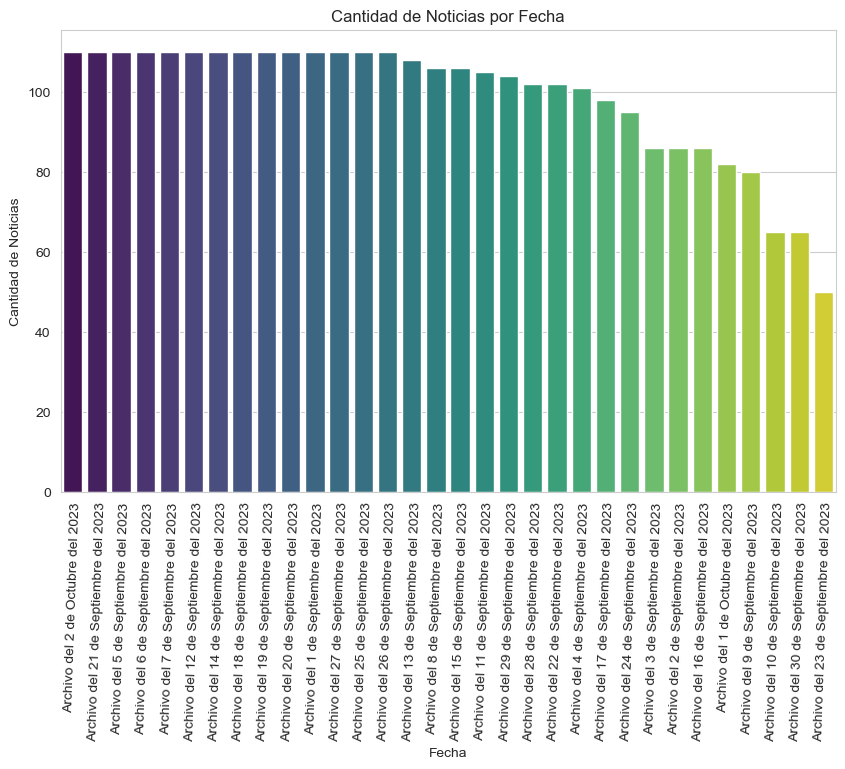

In [19]:
# Cuenta el número de noticias por fecha
conteo_por_fecha = df['Fecha'].value_counts()

# Imprime el conteo exacto
print(conteo_por_fecha)

# Configuración de estilo para el gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
sns.barplot(x=conteo_por_fecha.index, y=conteo_por_fecha.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Noticias")
plt.title("Cantidad de Noticias por Fecha")

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=88)

# Mostrar el gráfico
plt.show()


In [ ]:
cantidad de noticia por autor

desconocido                         648
Leonardo Ancajima                   244
José Luis Blanco Pagán              187
Erick Chavez                        165
Luis Felipe Rodriguez Jimenez       147
Diego Ayma Ayma                     140
Guadalupe Gamboa                    114
Renzo Castillo Lazo                 113
Harold Quispe                       111
Renzo Alvarez                       106
Jorge Luis Pinedo Barrera           105
Sandra Loise Reyes Martinez          97
Renzo Napa                           93
Sergio Espinoza                      87
Fernando Chuquillanqui               84
Brenda García Retamal                83
Jair Zevallos Morón                  79
Maritza Saenz                        74
Pedro Luis Ramos Martinez            66
Julio Cisneros                       50
Diego Figueroa Loayza                47
Alberto Nishiyama                    36
Andrés Gallegos                      32
Andrea Closa                         28
Sebastián Acosta                     25


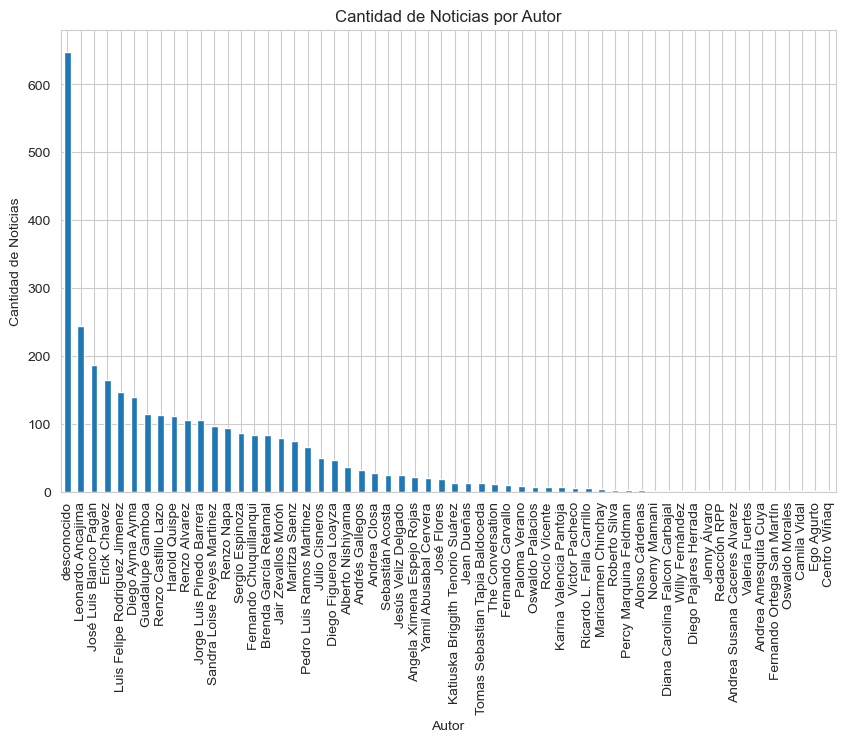

In [20]:
# Contar la cantidad de noticias por autor
conteo_autor = df['Autor'].value_counts()

# Mostrar el conteo
print(conteo_autor)

# Mostrar un gráfico de barras
plt.figure(figsize=(10, 6))
conteo_autor.plot(kind='bar')
plt.title('Cantidad de Noticias por Autor')
plt.xlabel('Autor')
plt.ylabel('Cantidad de Noticias')
plt.show()


In [ ]:
 Predecir el número de noticias basado en una única característica (por ejemplo, la hora de publicación).
Variable Dependiente: Número de noticias.
Variable Independiente: Hora de Publicación.


In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Leer el DataFrame


# Agrupar por autor y contar el número de noticias
conteo_por_autor = df['Autor'].value_counts().reset_index()
conteo_por_autor.columns = ['Autor', 'Numero_de_Noticias']

# Agregar esta información al DataFrame original
df = pd.merge(df, conteo_por_autor, on='Autor', how='left')

# Seleccionar las características para la regresión
X = df[['Numero_de_Noticias']]

# Definir la variable objetivo (número de noticias futuras)
y = df['Numero_de_Noticias']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Mostrar resultados
print("Coeficiente de regresión:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

# Puedes usar y_pred para obtener las predicciones para un conjunto de datos no visto


Coeficiente de regresión: [1.]
Intercepto: -7.673861546209082e-13


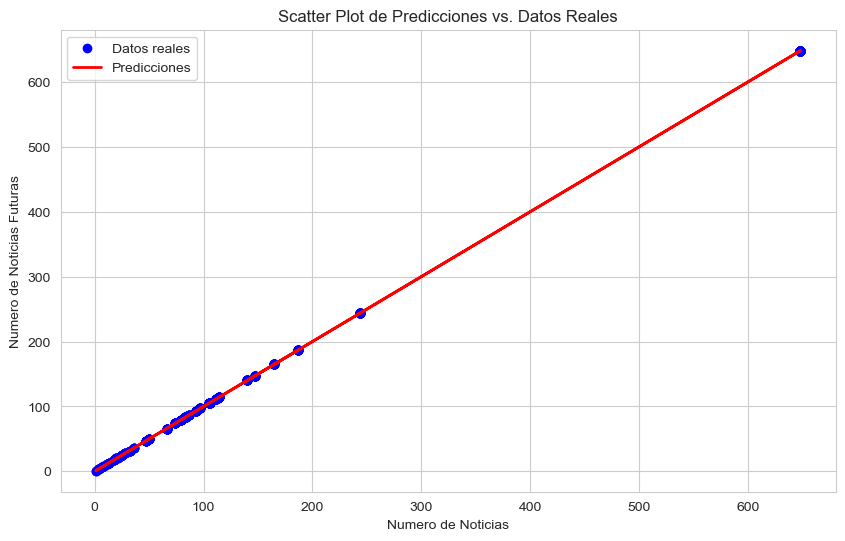

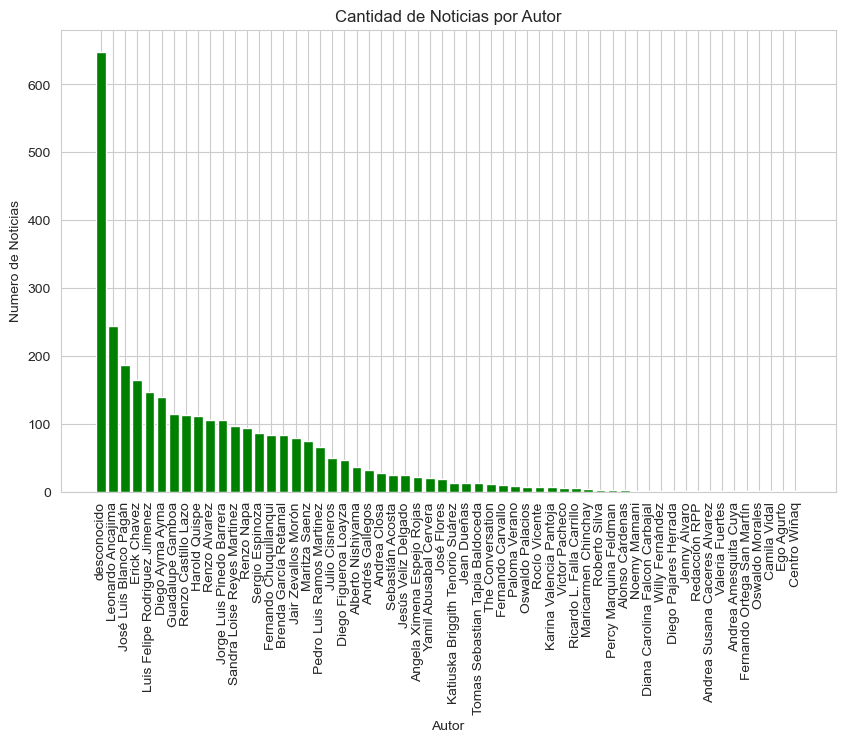

In [24]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')
plt.title('Scatter Plot de Predicciones vs. Datos Reales')
plt.xlabel('Numero de Noticias')
plt.ylabel('Numero de Noticias Futuras')
plt.legend()
plt.show()

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(conteo_por_autor['Autor'], conteo_por_autor['Numero_de_Noticias'], color='green')
plt.title('Cantidad de Noticias por Autor')
plt.xlabel('Autor')
plt.ylabel('Numero de Noticias')
plt.xticks(rotation=90)
plt.show()
